### Finding Lane Lines


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read images

shape:  (540, 960, 3)


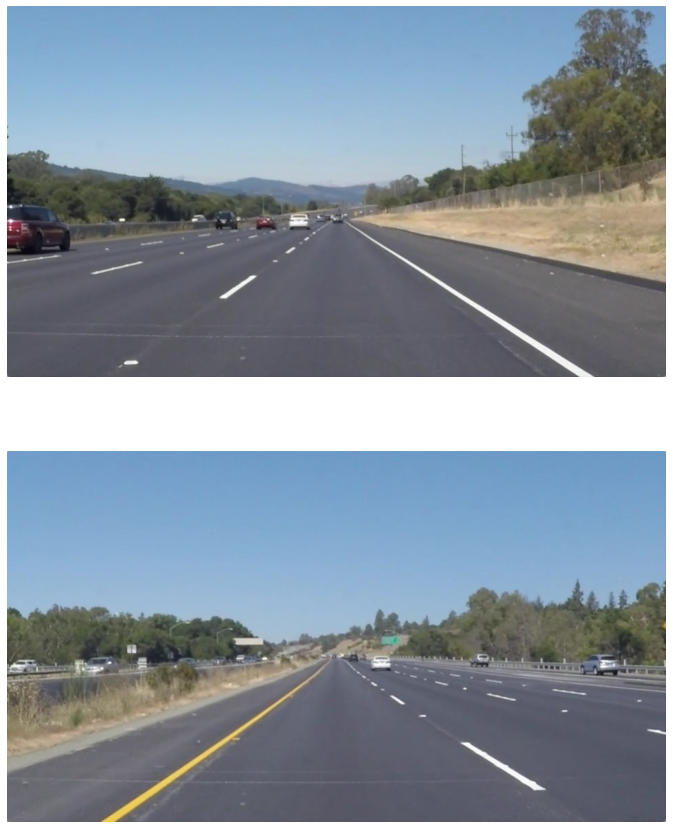

In [3]:
img1 = cv2.imread('solidWhiteRight.jpg')
img2 = cv2.imread('solidYellowLeft.jpg')

print('shape: ', img1.shape)
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2,1,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### 도로 라인 지정

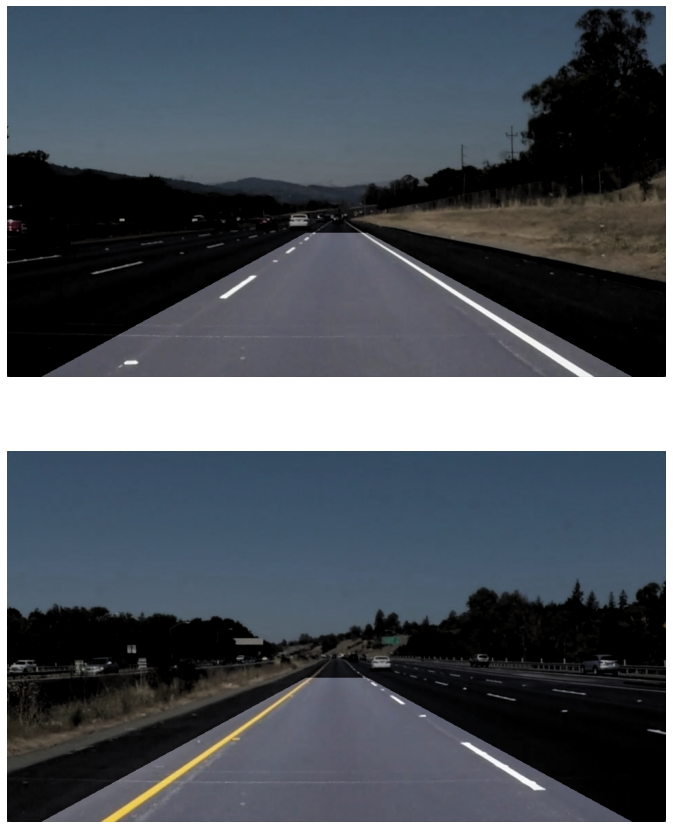

In [16]:
listOfFiles = ['solidWhiteRight.jpg', 'solidYellowLeft.jpg']

plt.figure(figsize=(15,15))

for i, file in enumerate(listOfFiles):
    img = cv2.imread(file)
    height, width = img.shape[:2]
    # 직접 사다리꼴 도로 라인 지정
    vertices = np.array([[(50, height), (width/2 - 45, height/2 + 60),
                          (width/2 + 45, height/2 + 60), (width - 50, height)]], dtype='int')
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    mask = np.zeros(img.shape[:2])
    cv2.fillPoly(mask, vertices, 255)

    inv_mask = cv2.bitwise_not(mask.astype('uint8'))
    v = cv2.addWeighted(v, 1.0, inv_mask, -0.4, 0.0)

    roi = cv2.merge([h, s, v])
    roi = cv2.cvtColor(roi, cv2.COLOR_HSV2RGB)

    plt.subplot(2, 1 , i+1)
    plt.imshow(roi)
    plt.axis('off')
plt.show()

### 과제


In [17]:
def region_of_interest(img, vertices):
    '''
    영상에서 관심 영역만 남김

    Parameters
    ----------
    img: array
        적용할 타겟 영상
    vertices: list of points
        관심 영역의 좌표점들이 저장된 리스트
    '''
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)

    return cv2.bitwise_and(img, mask)

def full_pipeline(img):
    '''
    To do
    차선 검출을 위한 전체 파이프라인 코드
    '''
    result = np.copy(img)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(result, (x1, y1), (x2, y2), color=(0,0,255), thickness=5)
    return result


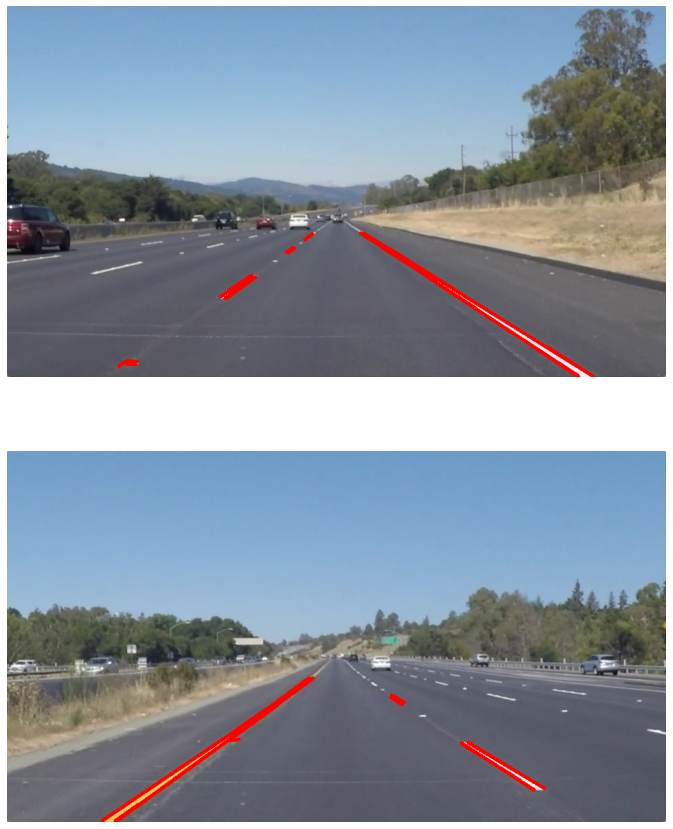

In [52]:
def full_pipeline(img):
    height, width = img.shape[:2]
    # 직접 사다리꼴 도로 라인 지정
    vertices = np.array([[(50, height), (width/2 - 45, height/2 + 60),
                          (width/2 + 45, height/2 + 60), (width - 50, height)]], dtype='int')
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    blur_img = cv2.GaussianBlur(gray_img, (3, 3), 0)
    edge_img = cv2.Canny(blur_img, 70, 180)

    roi_img = region_of_interest(edge_img, vertices)
    lines = cv2.HoughLinesP(roi_img, rho=1,
                            theta=np.pi/180,
                            threshold=10,
                            minLineLength=10,
                            maxLineGap=5)
    result = np.copy(img)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(result, (x1, y1), (x2, y2), color=(0,0,255), thickness=3)

    return result


listOfFiles = ['solidWhiteRight.jpg', 'solidYellowLeft.jpg']

plt.figure(figsize=(15,15))
for i, file in enumerate(listOfFiles):
    img = cv2.imread(file)
    result = full_pipeline(img)
    result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 1 , i+1)
    plt.imshow(result)
    plt.axis('off')
plt.show()